In [1]:
from sklearn.naive_bayes import GaussianNB
import os
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

Number of Selected Features: 24
SVM Accuracy: 57.404761904761905
SVM Precision: 58.105147864184005
SVM Recall: 50.88729016786571
SVM F1 Score: 54.25722321656865


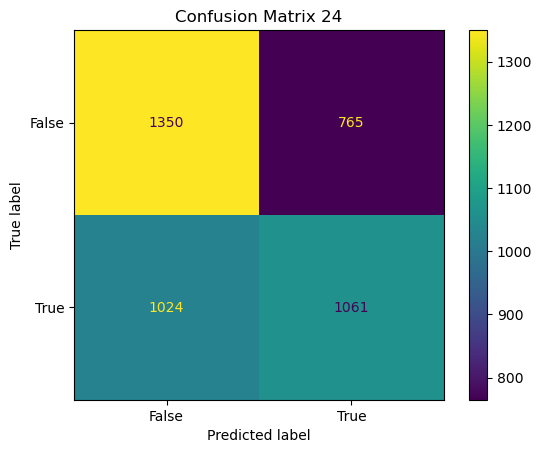


Number of Selected Features: 23
SVM Accuracy: 56.76190476190476
SVM Precision: 58.348851644941035
SVM Recall: 45.08393285371702
SVM F1 Score: 50.86580086580087


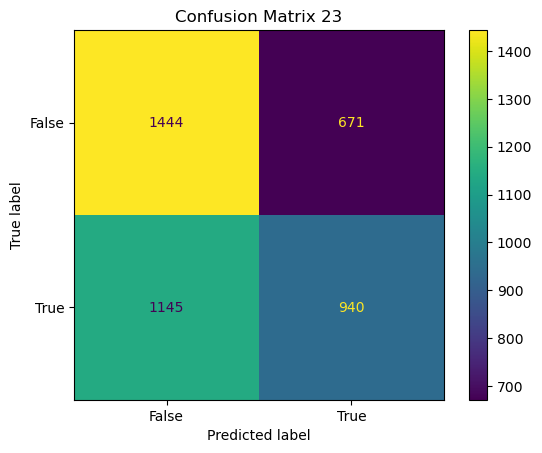


Number of Selected Features: 22
SVM Accuracy: 56.785714285714285
SVM Precision: 58.37468982630273
SVM Recall: 45.13189448441247
SVM F1 Score: 50.90614011360562


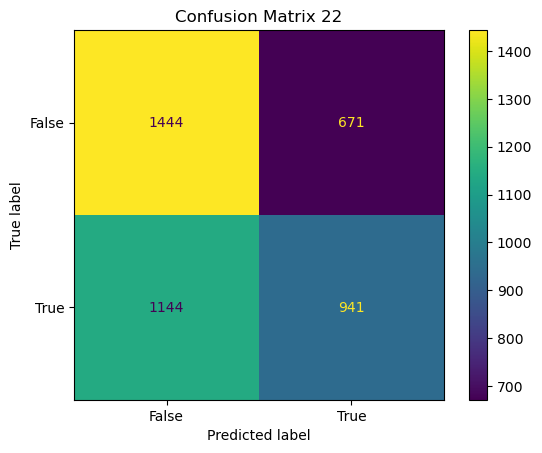


Number of Selected Features: 21
SVM Accuracy: 56.547619047619044
SVM Precision: 58.43060959792478
SVM Recall: 43.21342925659473
SVM F1 Score: 49.6829335539013


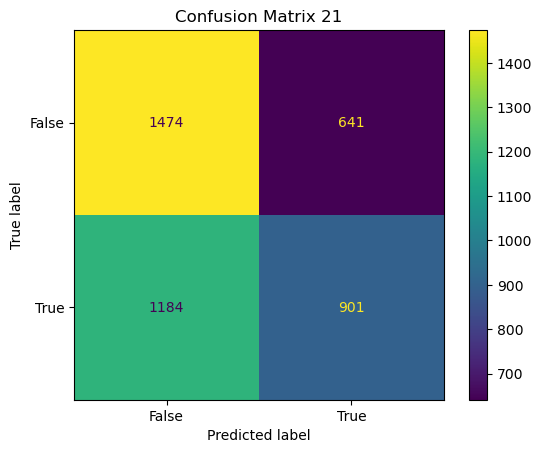


Number of Selected Features: 20
SVM Accuracy: 56.547619047619044
SVM Precision: 58.43060959792478
SVM Recall: 43.21342925659473
SVM F1 Score: 49.6829335539013


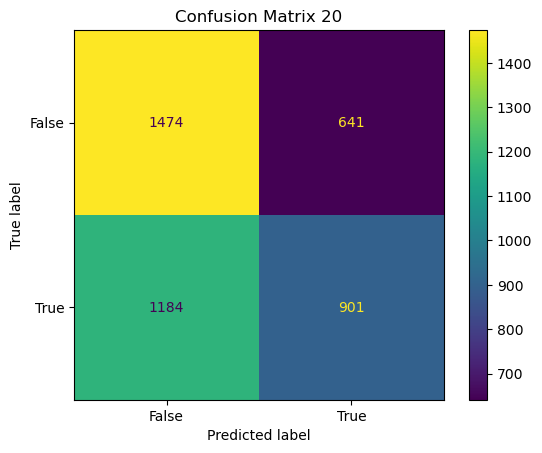


Number of Selected Features: 19
SVM Accuracy: 56.57142857142857
SVM Precision: 58.47953216374269
SVM Recall: 43.16546762589928
SVM F1 Score: 49.668874172185426


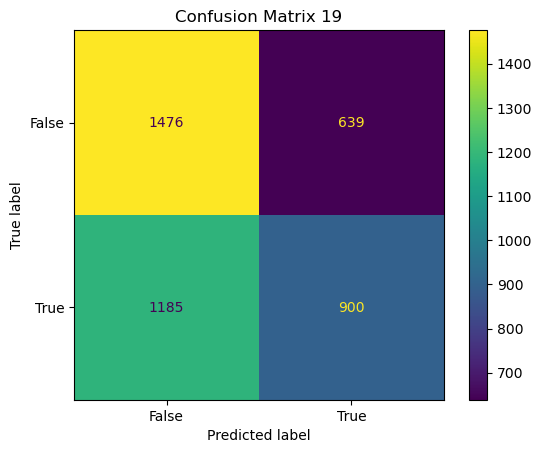


Number of Selected Features: 18
SVM Accuracy: 56.52380952380952
SVM Precision: 58.41455490578298
SVM Recall: 43.117505995203835
SVM F1 Score: 49.613686534216335


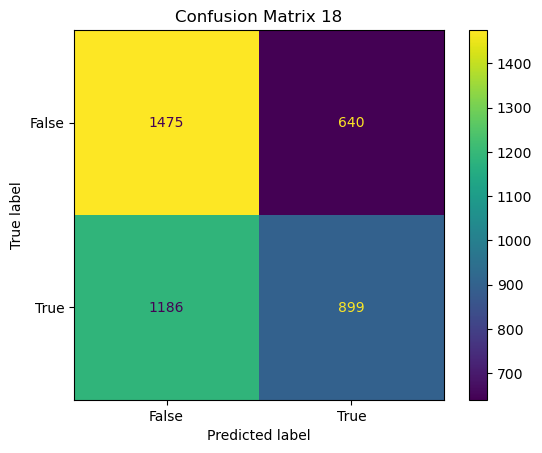


Number of Selected Features: 17
SVM Accuracy: 56.47619047619048
SVM Precision: 58.39320705421294
SVM Recall: 42.87769784172662
SVM F1 Score: 49.44690265486726


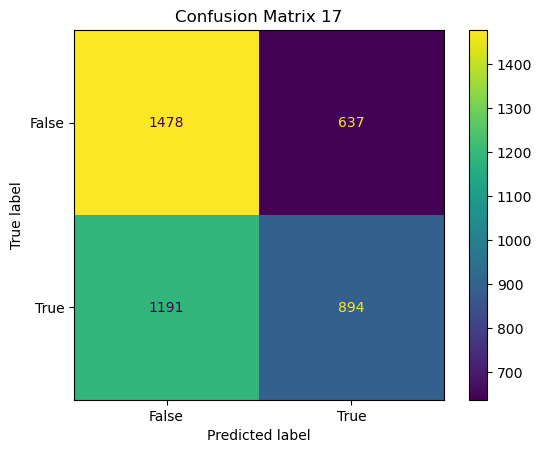


Number of Selected Features: 16
SVM Accuracy: 56.23809523809524
SVM Precision: 58.15181518151815
SVM Recall: 42.254196642685855
SVM F1 Score: 48.94444444444444


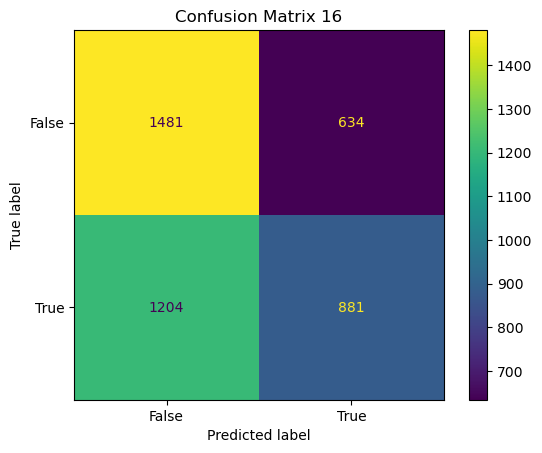


Number of Selected Features: 15
SVM Accuracy: 55.80952380952381
SVM Precision: 57.38233397807866
SVM Recall: 42.68585131894484
SVM F1 Score: 48.95489548954895


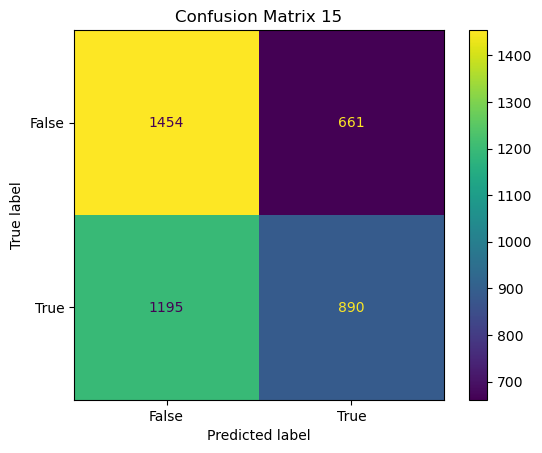


Number of Selected Features: 14
SVM Accuracy: 55.88095238095237
SVM Precision: 57.503234152652006
SVM Recall: 42.6378896882494
SVM F1 Score: 48.9672266593225


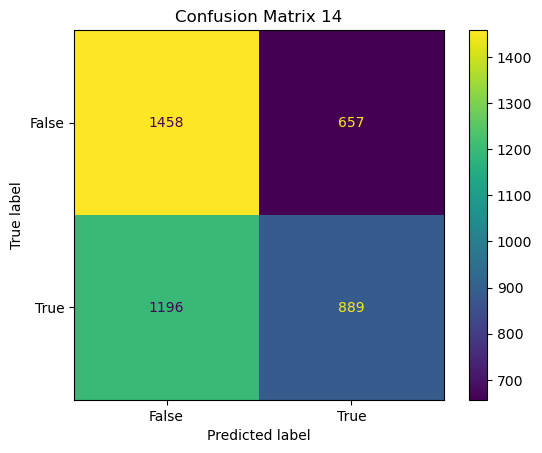


Number of Selected Features: 13
SVM Accuracy: 55.833333333333336
SVM Precision: 57.390745501285345
SVM Recall: 42.829736211031175
SVM F1 Score: 49.052458115902226


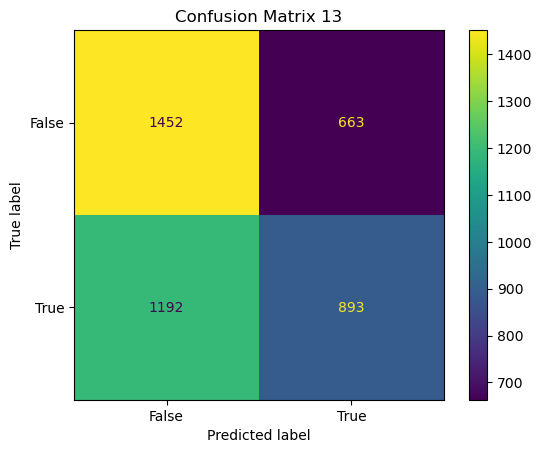


Number of Selected Features: 12
SVM Accuracy: 56.00000000000001
SVM Precision: 57.37398879900436
SVM Recall: 44.22062350119904
SVM F1 Score: 49.945828819068254


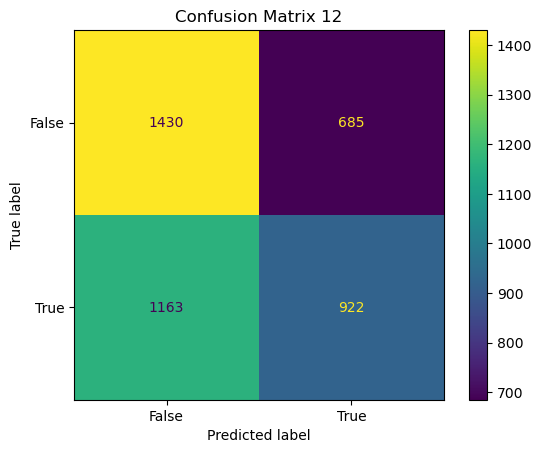


Number of Selected Features: 11
SVM Accuracy: 56.047619047619044
SVM Precision: 57.39938080495356
SVM Recall: 44.460431654676256
SVM F1 Score: 50.108108108108105


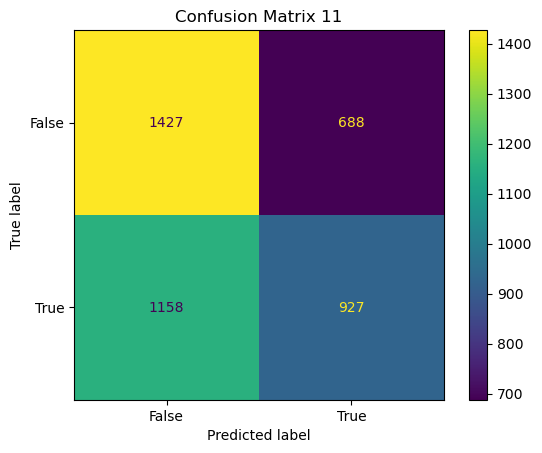


Number of Selected Features: 10
SVM Accuracy: 55.714285714285715
SVM Precision: 58.51627554882665
SVM Recall: 37.07434052757794
SVM F1 Score: 45.390487375220204


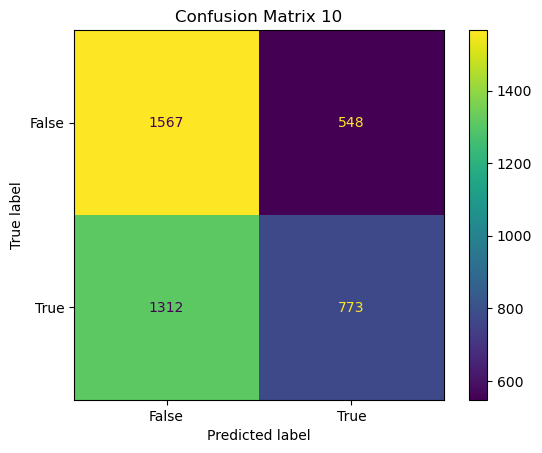


Number of Selected Features: 9
SVM Accuracy: 56.166666666666664
SVM Precision: 59.886547811993516
SVM Recall: 35.44364508393285
SVM F1 Score: 44.53148538716481


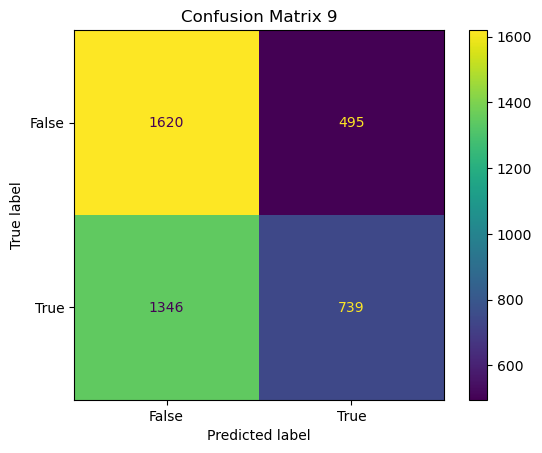


Number of Selected Features: 8
SVM Accuracy: 55.88095238095237
SVM Precision: 64.35643564356435
SVM Recall: 24.940047961630697
SVM F1 Score: 35.94884203249222


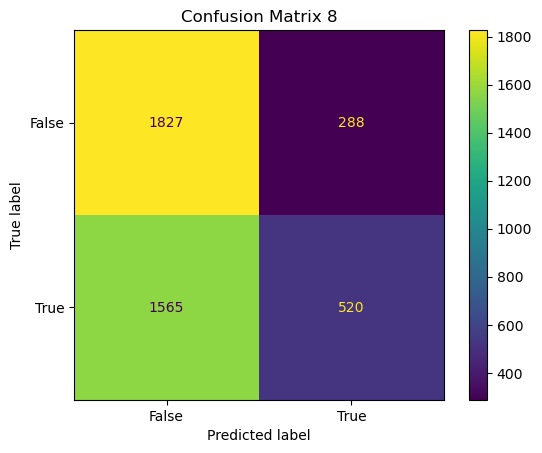


Number of Selected Features: 7
SVM Accuracy: 56.11904761904762
SVM Precision: 64.90147783251231
SVM Recall: 25.275779376498804
SVM F1 Score: 36.382464618570935


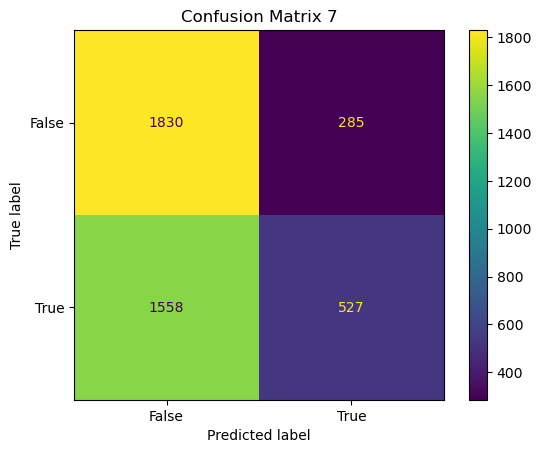


Number of Selected Features: 6
SVM Accuracy: 56.02380952380952
SVM Precision: 64.91228070175438
SVM Recall: 24.84412470023981
SVM F1 Score: 35.93479014915019


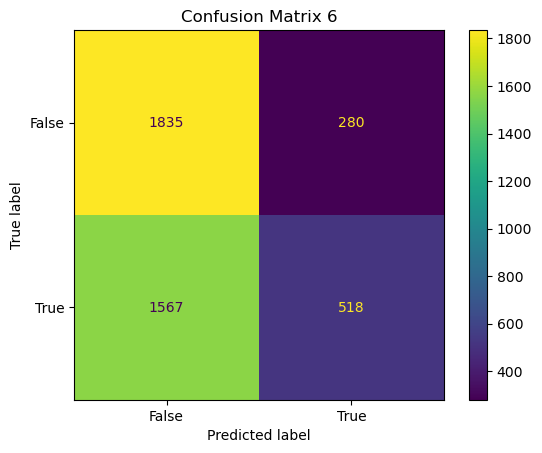


Number of Selected Features: 5
SVM Accuracy: 56.14285714285714
SVM Precision: 66.35262449528938
SVM Recall: 23.645083932853716
SVM F1 Score: 34.865629420084865


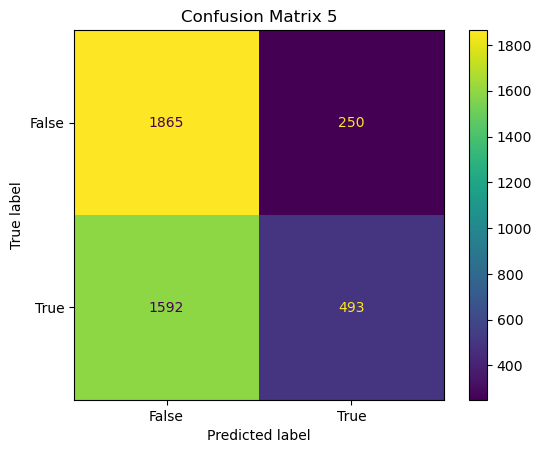


Number of Selected Features: 4
SVM Accuracy: 56.11904761904762
SVM Precision: 66.66666666666666
SVM Recall: 23.213429256594726
SVM F1 Score: 34.436143721095696


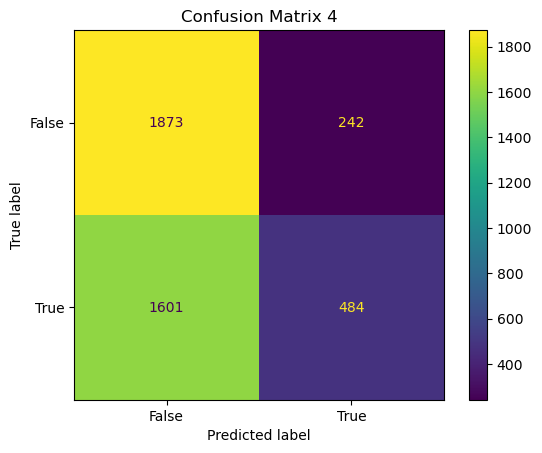


Number of Selected Features: 3
SVM Accuracy: 55.30952380952381
SVM Precision: 65.29411764705883
SVM Recall: 21.294964028776977
SVM F1 Score: 32.11573236889693


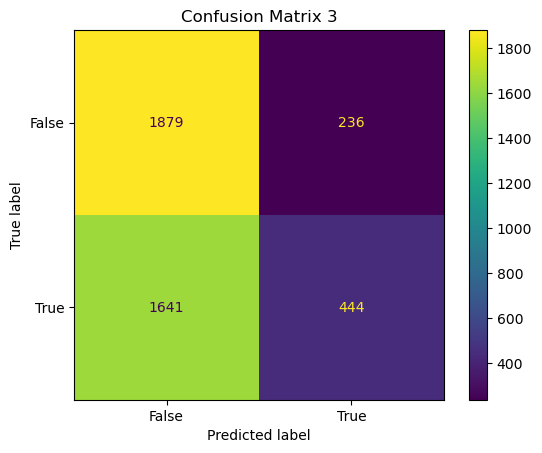


Number of Selected Features: 2
SVM Accuracy: 55.19047619047619
SVM Precision: 65.30920060331825
SVM Recall: 20.7673860911271
SVM F1 Score: 31.513828238719064


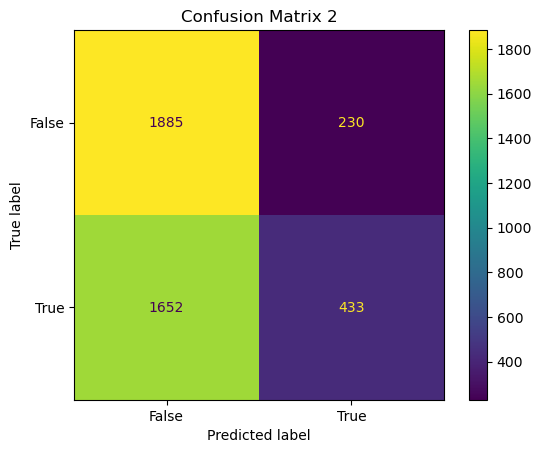


Number of Selected Features: 1
SVM Accuracy: 54.595238095238095
SVM Precision: 65.78014184397163
SVM Recall: 17.793764988009592
SVM F1 Score: 28.010570026425064


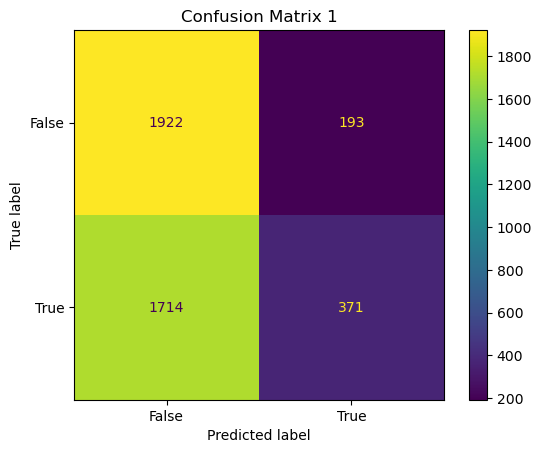

In [3]:
# Set working directory
os.chdir('C:/Users/asus/Documents/GitHub/CMSC-197-Miniproject')

# Read JSON file
df = pd.read_json('data/VADER_normalized.json', orient='records')

# Assign X and y
X = df.drop(['Label'], axis=1)
y = df['Label']

# Training and test set
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

n_features_range = range(X.shape[1], 0, -1)

# SVM
svm = SVC(kernel='linear')

for n_features_to_select in n_features_range:
    rfe = RFE(svm, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)

    X_train_transformed = rfe.transform(X_train)
    X_test_transformed = rfe.transform(X_test)

    svm.fit(X_train_transformed, y_train)
    predictions = svm.predict(X_test_transformed)

    svm_accuracy = accuracy_score(y_test, predictions) * 100
    svm_precision = precision_score(y_test, predictions) * 100
    svm_recall = recall_score(y_test, predictions) * 100
    svm_f1_score = f1_score(y_test, predictions) * 100

    print(f"Number of Selected Features: {n_features_to_select}")
    print(f"SVM Accuracy: {svm_accuracy}")
    print(f"SVM Precision: {svm_precision}")
    print(f"SVM Recall: {svm_recall}")
    print(f"SVM F1 Score: {svm_f1_score}")

    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot()
    plt.title("Confusion Matrix " + str(n_features_to_select))  
    plt.show()
    print()